公式: $y = m_{1}x_{1} + m_{2}x_{2} + m_{3}x_{3} + ... + m_{n}x_{n}$

小 project: 使用本書提供的 ```Housing_Modified.csv``` 檔案來做 multivariate Regression

### 1. 搞清楚資料內容與型態:

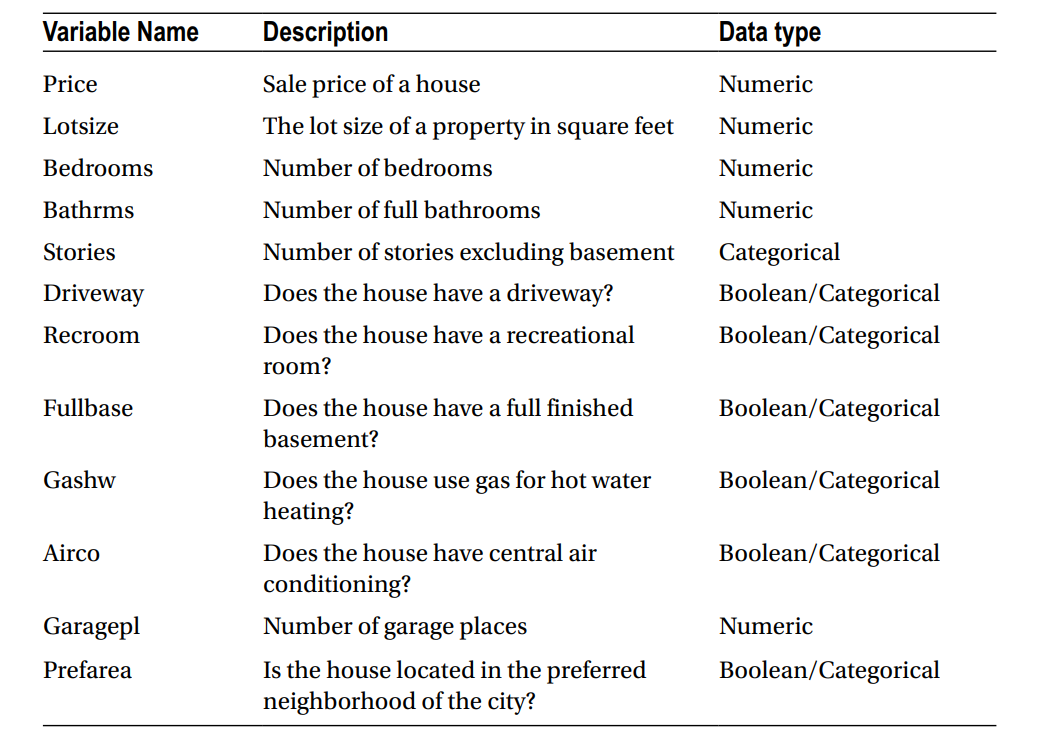

### 2. 處理 <font color='red'> categorical data </font>:

從上圖可以看到，```Stories```、```Driveway```、```Recroom```、```Fullbase```、```Gashw```、```Airco```、```Prefarea``` 都是 categorical data

而要將 categorical data 轉成 numerical data，有四種方法:  
- (Scikit Learn 裡的) Label Binarizer: replace the binary variable text with numeric vales
- (Scikit Learn 裡的) Label Encoder: replace category level with number representation
- (Scikit Learn 裡的) One Hot Encoder: convert n levels to n-1 new variable, and the new variables will use 1 to indicate the presence of level and 0 for otherwise (注意: 用 One Hot Encoder 時資料必須已經是 number 了)
- (Pandas 的) ```get_dummies()``` 

### 3. 處理 Multicollinearity 問題:

方法: 檢測 $VIF (Variation\ Inflation\ Factor)$:
$$VIF_{i} = \frac{1}{1-R_{i}}$$

有關於膨脹因子，簡單來說就是各個解釋變數 ($x_{i}$) 之間是否相關。  
Rule of thumb: 任何一個解釋變數 ($x_{i}$) 超過 10，就把那個變數刪除。

### 4. 建造 multivariate regression model!

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\User\Machine_Learning\mastering-ml-w-python-in-six-steps-master\Chapter_3_Code\Code\Data\Housing_modified.csv")

In [4]:
df

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,two,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,four,yes,yes,no,no,yes,0,no
542,94000.0,6000,3,2,four,yes,no,no,no,yes,0,no
543,103000.0,6000,3,2,four,yes,yes,no,no,yes,1,no
544,105000.0,6000,3,2,two,yes,yes,no,no,yes,1,no


In [5]:
from sklearn import preprocessing

In [6]:
lb = preprocessing.LabelBinarizer()

In [7]:
df.driveway = lb.fit_transform(df.driveway)

In [8]:
df # 發現 driveway 被改成數字型態了! 

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,1,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,1,no,no,no,no,0,no
2,49500.0,3060,3,1,one,1,no,no,no,no,0,no
3,60500.0,6650,3,1,two,1,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,1,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,four,1,yes,no,no,yes,0,no
542,94000.0,6000,3,2,four,1,no,no,no,yes,0,no
543,103000.0,6000,3,2,four,1,yes,no,no,yes,1,no
544,105000.0,6000,3,2,two,1,yes,no,no,yes,1,no


In [9]:
df.driveway = lb.fit_transform(df.driveway)
df.recroom = lb.fit_transform(df.recroom)
df.fullbase = lb.fit_transform(df.fullbase)
df.gashw = lb.fit_transform(df.gashw)
df.airco = lb.fit_transform(df.airco)
df.prefarea = lb.fit_transform(df.prefarea)

In [10]:
df

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,1,0,1,0,0,1,0
1,38500.0,4000,2,1,one,1,0,0,0,0,0,0
2,49500.0,3060,3,1,one,1,0,0,0,0,0,0
3,60500.0,6650,3,1,two,1,1,0,0,0,0,0
4,61000.0,6360,2,1,one,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,four,1,1,0,0,1,0,0
542,94000.0,6000,3,2,four,1,0,0,0,1,0,0
543,103000.0,6000,3,2,four,1,1,0,0,1,1,0
544,105000.0,6000,3,2,two,1,1,0,0,1,1,0


注意到 ```stories```，雖然他也是 categorical data，但他不是布林值，因此不能套用 ```lb.fit_transform()```    
我們用 ```pandas``` 裡的 ```get_dummies()``` 方法。

In [11]:
df_stories = pd.get_dummies(df['stories'], prefix='Story', drop_first=False)

In [12]:
df_stories

,Story_four,Story_one,Story_three,Story_two
0,0,0,0,1
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
541,1,0,0,0
542,1,0,0,0
543,1,0,0,0
544,0,0,0,1


如此一來，我們就把原本的 ```df['stories']``` 資料轉成一個全新的 dataframe。  
但注意到現在有四個 dummy 變數 (```Story_four```, ```Story_one```, ```Story_three```, ```Story_two```)。但其實我們只需要有三個變數即可 (如果某間房子，他的 ```Story_four```, ```Story_one```, ```Story_three``` 都是 0，那他就一定是 2 個 stories)。  
因此我們可以設定 ```drop_first``` 參數為 ```True```。

In [13]:
df_stories = pd.get_dummies(df['stories'], prefix='Story', drop_first=True)

In [14]:
df_stories

,Story_one,Story_three,Story_two
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
541,0,0,0
542,0,0,0
543,0,0,0
544,0,0,1


In [15]:
df = pd.concat([df, df_stories], axis=1) # 把新的 data frame 加入原 data frame 中，並把 stories colum 刪除

In [16]:
df

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,Story_one,Story_three,Story_two
0,42000.0,5850,3,1,two,1,0,1,0,0,1,0,0,0,1
1,38500.0,4000,2,1,one,1,0,0,0,0,0,0,1,0,0
2,49500.0,3060,3,1,one,1,0,0,0,0,0,0,1,0,0
3,60500.0,6650,3,1,two,1,1,0,0,0,0,0,0,0,1
4,61000.0,6360,2,1,one,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,four,1,1,0,0,1,0,0,0,0,0
542,94000.0,6000,3,2,four,1,0,0,0,1,0,0,0,0,0
543,103000.0,6000,3,2,four,1,1,0,0,1,1,0,0,0,0
544,105000.0,6000,3,2,two,1,1,0,0,1,1,0,0,0,1


In [17]:
del df['stories']

In [18]:
df

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,Story_one,Story_three,Story_two
0,42000.0,5850,3,1,1,0,1,0,0,1,0,0,0,1
1,38500.0,4000,2,1,1,0,0,0,0,0,0,1,0,0
2,49500.0,3060,3,1,1,0,0,0,0,0,0,1,0,0
3,60500.0,6650,3,1,1,1,0,0,0,0,0,0,0,1
4,61000.0,6360,2,1,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,1,1,0,0,1,0,0,0,0,0
542,94000.0,6000,3,2,1,0,0,0,1,0,0,0,0,0
543,103000.0,6000,3,2,1,1,0,0,1,1,0,0,0,0
544,105000.0,6000,3,2,1,1,0,0,1,1,0,0,0,1


資料都是數值型態後，就可以開始分析了

In [19]:
import statsmodels.api as sm

In [20]:
corr = df.corr()
corr

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,Story_one,Story_three,Story_two
price,1.000000,0.535796,0.366447,0.516719,0.297167,0.254960,0.186218,0.092837,0.453347,0.383302,0.329074,-0.270058,0.138254,-0.002089
lotsize,0.535796,1.000000,0.151851,0.193833,0.288778,0.140327,0.047487,-0.009201,0.221765,0.352872,0.234782,0.054348,0.020567,-0.159612
bedrooms,0.366447,0.151851,1.000000,0.373769,-0.011996,0.080492,0.097201,0.046028,0.160412,0.139117,0.078953,-0.509974,0.099150,0.377424
bathrms,0.516719,0.193833,0.373769,1.000000,0.041955,0.126892,0.102791,0.067365,0.184955,0.178178,0.064013,-0.250784,0.036027,0.080982
driveway,0.297167,0.288778,-0.011996,0.041955,1.000000,0.091959,0.043428,-0.011942,0.106290,0.203682,0.199378,-0.053249,0.073533,-0.047074
recroom,0.254960,0.140327,0.080492,0.126892,0.091959,1.000000,0.372434,-0.010119,0.136626,0.038122,0.161292,-0.022632,-0.038733,0.006938
fullbase,0.186218,0.047487,0.097201,0.102791,0.043428,0.372434,1.000000,0.004677,0.045248,0.052524,0.228651,0.059154,-0.132540,0.098694
gashw,0.092837,-0.009201,0.046028,0.067365,-0.011942,-0.010119,0.004677,1.000000,-0.130350,0.068144,-0.059170,-0.060336,0.072922,0.054823
airco,0.453347,0.221765,0.160412,0.184955,0.106290,0.136626,0.045248,-0.130350,1.000000,0.156596,0.115626,-0.143174,0.110682,-0.074706
garagepl,0.383302,0.352872,0.139117,0.178178,0.203682,0.038122,0.052524,0.068144,0.156596,1.000000,0.092364,0.016610,-0.079170,-0.041931


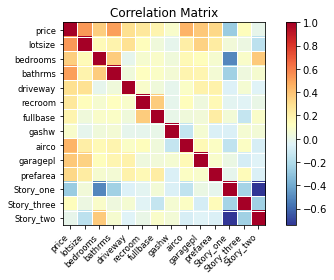

In [21]:
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

從上面的 Correlation matrix 我們注意到 story one 跟 story two 有滿顯著的負相關  
因此下面對所有變數都做 $VIF$ 檢測。

In [22]:
independent_variables = ['lotsize', 'bedrooms', 'bathrms','driveway', \
                         'recroom', 'fullbase','gashw','airco','garagepl', \
                         'prefarea', 'Story_two','Story_one','Story_three']

In [23]:
X = df[independent_variables]
Y = df.price

In [24]:
thresh = 10 # thresh stands for threshold (門檻值; 閥值)

```statsmodels``` 裡的 ```variance_inflation_factor``` 方法終須提供兩個參數，分別是:  
- ```exog``` : <font color='red'>an array containing features</font> on which linear regression is performed.  
- ```exog_idx``` : <font color='red'>index of the additional feature</font> whose influence on the other features is to be measured.

In [25]:
X[independent_variables].values # this is the array we want to perform lr

array([[5850,    3,    1, ...,    1,    0,    0],
       [4000,    2,    1, ...,    0,    1,    0],
       [3060,    3,    1, ...,    0,    1,    0],
       ...,
       [6000,    3,    2, ...,    0,    0,    0],
       [6000,    3,    2, ...,    1,    0,    0],
       [6000,    3,    1, ...,    1,    0,    0]], dtype=int64)

In [26]:
X[independent_variables].shape

(546, 13)

In [27]:
X[independent_variables].shape[1] # these are the index (也就是對每個 Column，都要跟別人做一次 VIF 測試)

13

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
egg = [variance_inflation_factor(X[independent_variables].values, ix) for ix in range(X[independent_variables].shape[1])]

In [30]:
egg

[8.958098087844336,
 18.469878559519948,
 8.984672347290864,
 7.088578542091886,
 1.4770152815033917,
 2.013320236472386,
 1.1034879198994194,
 1.7567462065609025,
 1.9826489313438442,
 1.5332946465459893,
 5.511702408354892,
 3.965752674786861,
 1.7700402770614867]

In [31]:
type(egg)

list

In [32]:
a = egg.index(max(egg)) # 用 list 裡的 .index() 可以找到特定元素的 index
a

1

```egg``` 是一個變數對其他變數做 $VIF$ 的結果

完整對所有 variables 做 $VIF$:  

In [33]:
thresh = 10
for i in np.arange(0, len(independent_variables)):
    vif = [variance_inflation_factor(X[independent_variables].values, ix) for ix in range(X[independent_variables].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print("VIF: {}".format(vif))
        print("Dropping {} at index {}: ".format(X[independent_variables].columns[maxloc], maxloc))
        del independent_variables[maxloc]
    else:
        break
print(" ")
print("Final variables: {}".format(independent_variables))
print(len(independent_variables))

VIF: [8.958098087844336, 18.469878559519948, 8.984672347290864, 7.088578542091886, 1.4770152815033917, 2.013320236472386, 1.1034879198994194, 1.7567462065609025, 1.9826489313438442, 1.5332946465459893, 5.511702408354892, 3.965752674786861, 1.7700402770614867]
Dropping bedrooms at index 1: 
 
Final variables: ['lotsize', 'bathrms', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'Story_two', 'Story_one', 'Story_three']
12


建造 multivariate regression model!

In [46]:
X = df[independent_variables]
y = df['price']

將現有資料 80% 拿去 training，20% 拿去做 testing 

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [55]:
print(np.shape(X_train))
print(np.shape(X_test))

print(436/110)

(436, 12)
(110, 12)
3.963636363636364


注意: 不要被 notation 搞混了，```X``` 都代表 解釋變數，```y``` 代表被解釋變數，差別只在 ```X```, ```y``` 是 training 還是 testing data set

In [58]:
lm = sm.OLS(y_train, X_train).fit()

In [59]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              730.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):                   1.93e-274
Time:                        16:48:43   Log-Likelihood:                         -4830.1
No. Observations:                 436   AIC:                                      9684.
Df Residuals:                     424   BIC:                                      9733.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
lotsize         4.2783      0.380     11.256      0.000       3.531       5.025
bathrms      1.985e+04   1403.176     14.149      0.000    1.71e+04    2.26e+04
driveway      1.21e+04   2108.278      5.742      0.000    7960.903    1.62e+04
recroom      6011.8160   2137.240      2.813      0.005    1810.911    1.02e+04
fullbase     4490.2693   1809.957      2.481      0.013     932.664    8047.874
gashw        1.554e+04   4315.047      3.602      0.000    7060.852     2.4e+04
airco        1.409e+04   1748.969      8.056      0.000    1.07e+04    1.75e+04
garagepl     3347.2131    966.056      3.465      0.001    1448.359    5246.067
prefarea     7634.7804   1939.349      3.937      0.000    3822.845    1.14e+04
Story_two    -960.9894   2215.697     -0.434      0.665   -5316.107    3394.129
Story_one   -6661.6204   2138.359     -3.115      0.002   -1.09e+04   -2458.516
Story_three  2275.9070   3498.684      0.651      0.516   -4601.017    9152.831
==============================================================================
Omnibus:                       29.091   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.535
Skew:                           0.417   Prob(JB):                     2.37e-12
Kurtosis:                       4.500   Cond. No.                     3.23e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

檢測迴歸成果:

In [61]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [64]:
print("Train MAE: ", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("Test MAE: ", mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train MAE:  11936.538252649116
Train RMSE:  15665.594263958714
Test MAE:  12687.915911901233
Test RMSE:  17167.586047334484


### Regression Diagnosis:

#### 1. 檢查 outliers 與 leverage [詳細比較兩者的文章](https://online.stat.psu.edu/stat462/node/170/)  
    outlier 指的是各個資料點與其他資料點是否在同一個範圍  
    leverage 則是 independent variables (x 軸)是否出現極值  
  

In [65]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

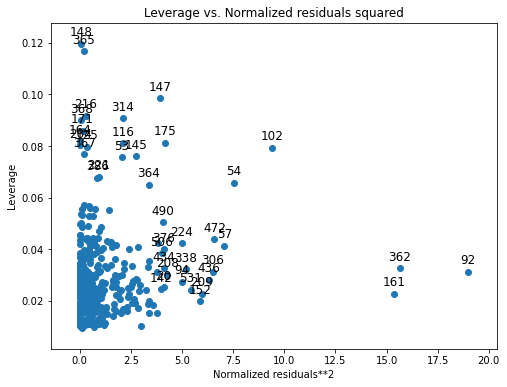

In [66]:
fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(lm, ax=ax)

上圖 x 軸是 residuals (表示 Outlier)，y 軸是 leverage

#### 2. Bonferroni outlier test 

課本:   
Running a Bonferroni outlier test will give us p-values for each observation, and   
those observations with p value < 0.05 are the outliers affecting the accuracy

In [68]:
test = lm.outlier_test()

In [70]:
print(test[test.icol(2) < 0.05]) #???

AttributeError: 'DataFrame' object has no attribute 'icol'

#### 3. Homoscedasticity and Normality

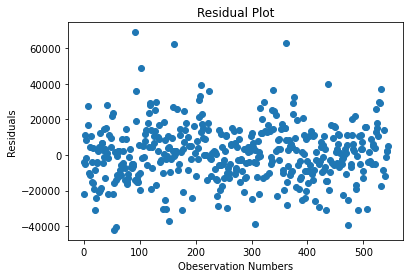

(array([1.23851323e-06, 6.19256617e-06, 1.54814154e-05, 2.60087779e-05,
        2.47702647e-05, 1.01145247e-05, 4.12837744e-06, 1.23851323e-06,
        2.06418872e-07, 6.19256617e-07]),
 array([-42141.09897272, -31029.81851142, -19918.53805011,  -8807.25758881,
          2304.0228725 ,  13415.3033338 ,  24526.5837951 ,  35637.86425641,
         46749.14471771,  57860.42517902,  68971.70564032]),
 <BarContainer object of 10 artists>)

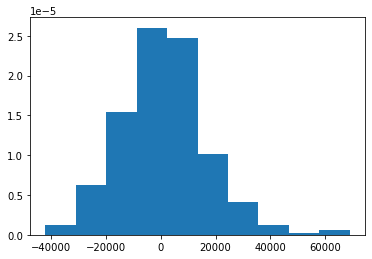

In [79]:
plt.plot(lm.resid, 'o')

plt.title("Residual Plot")
plt.xlabel("Obeservation Numbers")
plt.ylabel("Residuals")

plt.show()
plt.hist(lm.resid, density=True, stacked=True) # 將圖形標準化

from 官方 document:  
> If True, draw and return a probability density: each bin will display the bin's raw count divided by the total number of   counts and the bin width (density = counts / (sum(counts) * np.diff(bins))), so that the area under the histogram integrates to 1 (np.sum(density * np.diff(bins)) == 1).  
If stacked is also True, the sum of the histograms is normalized to 1.

#### 4. Linearity: 
the relationships between the predictors and the outcome variables 
should be linear

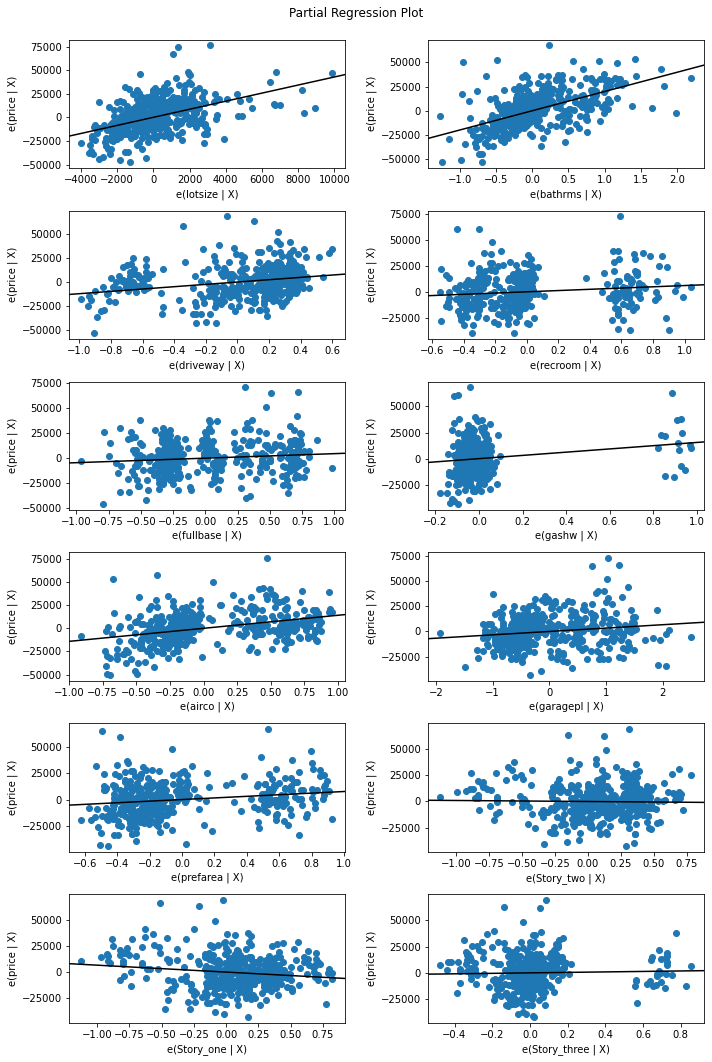

In [80]:
fig = plt.figure(figsize=(10, 15))
fig = sm.graphics.plot_partregress_grid(lm, fig=fig)